In [79]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import warnings
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn import metrics
from imblearn.combine import SMOTEENN
import gc
%matplotlib inline

warnings.filterwarnings("ignore")



def feat_select(train, test):
    features = train.drop(['is_trade', 'time', 'context_timestamp','instance_id'], axis=1).columns.tolist()
    feature = []
    target = ['is_trade']

    return features, target


def xgbCV(train, test):
    features, target = feat_select(train, test)

    X = train[features]
    y = train[target]
    X_tes = test[features]
    y_tes = test[target]

    print('Training XGB model...')
    X_train_set = xgb.DMatrix(X, label=y, missing=np.nan)
    X_validate_set = xgb.DMatrix(X_tes, label=y_tes, missing=np.nan)
    watchlist = [(X_train_set, 'train'), (X_validate_set, 'eval')]
    params = {'max_depth': 7,
              'nthread': -1,
              'eta': 0.01,
              'eval_metric': 'auc',
              'objective': 'binary:logistic',
              'subsample': 0.85,
              'colsample_bytree': 0.85,
              'silent': 1,
              'seed': 0,
              'min_child_weight': 6,
              'gpu_id': 0,
              'tree_method': 'gpu_hist',
              'scale_pos_weight':20
              }
    gbm = xgb.train(params, X_train_set, num_boost_round=3000, evals=watchlist, early_stopping_rounds=50)

    best_iter_num = gbm.best_iteration
    return best_iter_num


def sub(train, test, best_iter_num):
    features, target = feat_select(train, test)

    X = train[features]
    y = train[target]
    X_train_set = xgb.DMatrix(X, label=y, missing=np.nan)
    X_test_set = xgb.DMatrix(test[features], missing=np.nan)
    print('Training XGB model...')
    params = {'max_depth': 7,
              'nthread': -1,
              'eta': 0.01,
              'eval_metric': 'auc',
              'objective': 'binary:logistic',
              'subsample': 0.85,
              'colsample_bytree': 0.85,
              'silent': 1,
              'seed': 0,
              'min_child_weight': 6,
              'gpu_id': 0,
              'tree_method': 'gpu_hist',
              'scale_pos_weight':20
              }
    gbm = xgb.train(params, X_train_set, num_boost_round=best_iter_num)
    gbm.save_model('001.model')

In [2]:
path = './data/'
data = pd.read_csv(path + 'all_final_data_11-07-18-51.csv')
data = data[data.is_trade.notnull()]
train_data, test_data = train_test_split(data, test_size=0.25)

In [21]:
data[data.is_trade==1].shape

(9499, 250)

In [22]:
data[data.is_trade==0].shape

(469516, 250)

In [3]:
features, target = feat_select(train_data, test_data)
sm=SMOTEENN()
# X_resampled,y_resampled=sm.fit(train_data[features],train_data[target])

In [80]:
best_iter = xgbCV(train_data, test_data)
print('最佳迭代次数：', best_iter)

Training XGB model...
[0]	train-auc:0.752517	eval-auc:0.715744
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 50 rounds.
[1]	train-auc:0.76395	eval-auc:0.72494
[2]	train-auc:0.77234	eval-auc:0.728971
[3]	train-auc:0.776139	eval-auc:0.732423
[4]	train-auc:0.780518	eval-auc:0.733005
[5]	train-auc:0.781174	eval-auc:0.734667
[6]	train-auc:0.784037	eval-auc:0.735765
[7]	train-auc:0.784194	eval-auc:0.735939
[8]	train-auc:0.784984	eval-auc:0.736603
[9]	train-auc:0.785195	eval-auc:0.737299
[10]	train-auc:0.785251	eval-auc:0.737203
[11]	train-auc:0.785536	eval-auc:0.737762
[12]	train-auc:0.785844	eval-auc:0.738298
[13]	train-auc:0.785678	eval-auc:0.737875
[14]	train-auc:0.785412	eval-auc:0.737863
[15]	train-auc:0.785689	eval-auc:0.73774
[16]	train-auc:0.787583	eval-auc:0.738655
[17]	train-auc:0.787581	eval-auc:0.738938
[18]	train-auc:0.7882	eval-auc:0.739136
[19]	train-auc:0.788834	eval-auc:0.739152
[20]	train-au

[191]	train-auc:0.836807	eval-auc:0.7549
[192]	train-auc:0.837013	eval-auc:0.754933
[193]	train-auc:0.837252	eval-auc:0.75501
[194]	train-auc:0.83749	eval-auc:0.755056
[195]	train-auc:0.837756	eval-auc:0.755054
[196]	train-auc:0.838028	eval-auc:0.755157
[197]	train-auc:0.838248	eval-auc:0.755265
[198]	train-auc:0.838568	eval-auc:0.755364
[199]	train-auc:0.838747	eval-auc:0.755395
[200]	train-auc:0.838987	eval-auc:0.755502
[201]	train-auc:0.839245	eval-auc:0.755591
[202]	train-auc:0.839472	eval-auc:0.755675
[203]	train-auc:0.839717	eval-auc:0.75579
[204]	train-auc:0.840013	eval-auc:0.755842
[205]	train-auc:0.8403	eval-auc:0.755953
[206]	train-auc:0.840459	eval-auc:0.756081
[207]	train-auc:0.840706	eval-auc:0.756174
[208]	train-auc:0.840895	eval-auc:0.756198
[209]	train-auc:0.841115	eval-auc:0.756293
[210]	train-auc:0.841445	eval-auc:0.756339
[211]	train-auc:0.841713	eval-auc:0.756436
[212]	train-auc:0.841916	eval-auc:0.756466
[213]	train-auc:0.842145	eval-auc:0.756526
[214]	train-auc:0.

[383]	train-auc:0.875241	eval-auc:0.763988
[384]	train-auc:0.875419	eval-auc:0.764029
[385]	train-auc:0.875607	eval-auc:0.764049
[386]	train-auc:0.875817	eval-auc:0.764047
[387]	train-auc:0.87599	eval-auc:0.76412
[388]	train-auc:0.876175	eval-auc:0.764104
[389]	train-auc:0.876374	eval-auc:0.764111
[390]	train-auc:0.87661	eval-auc:0.764146
[391]	train-auc:0.876743	eval-auc:0.764194
[392]	train-auc:0.876937	eval-auc:0.76426
[393]	train-auc:0.877099	eval-auc:0.764297
[394]	train-auc:0.877181	eval-auc:0.764323
[395]	train-auc:0.877382	eval-auc:0.764387
[396]	train-auc:0.877539	eval-auc:0.764419
[397]	train-auc:0.877702	eval-auc:0.764455
[398]	train-auc:0.877888	eval-auc:0.764476
[399]	train-auc:0.878097	eval-auc:0.764526
[400]	train-auc:0.87827	eval-auc:0.76456
[401]	train-auc:0.878434	eval-auc:0.764581
[402]	train-auc:0.878543	eval-auc:0.764579
[403]	train-auc:0.878778	eval-auc:0.764626
[404]	train-auc:0.878999	eval-auc:0.764608
[405]	train-auc:0.879099	eval-auc:0.764629
[406]	train-auc:0

[575]	train-auc:0.900669	eval-auc:0.767179
[576]	train-auc:0.90073	eval-auc:0.767213
[577]	train-auc:0.900785	eval-auc:0.767241
[578]	train-auc:0.900841	eval-auc:0.767242
[579]	train-auc:0.900938	eval-auc:0.767212
[580]	train-auc:0.901103	eval-auc:0.767231
[581]	train-auc:0.901148	eval-auc:0.767226
[582]	train-auc:0.901333	eval-auc:0.767228
[583]	train-auc:0.901423	eval-auc:0.767235
[584]	train-auc:0.901513	eval-auc:0.767237
[585]	train-auc:0.901658	eval-auc:0.767227
[586]	train-auc:0.901816	eval-auc:0.767273
[587]	train-auc:0.901877	eval-auc:0.767311
[588]	train-auc:0.901978	eval-auc:0.767322
[589]	train-auc:0.902105	eval-auc:0.76734
[590]	train-auc:0.902201	eval-auc:0.767345
[591]	train-auc:0.902299	eval-auc:0.76735
[592]	train-auc:0.902354	eval-auc:0.767359
[593]	train-auc:0.902468	eval-auc:0.767376
[594]	train-auc:0.902553	eval-auc:0.767391
[595]	train-auc:0.902641	eval-auc:0.767417
[596]	train-auc:0.902776	eval-auc:0.767397
[597]	train-auc:0.902933	eval-auc:0.767421
[598]	train-au

[767]	train-auc:0.918279	eval-auc:0.767823
[768]	train-auc:0.918301	eval-auc:0.76782
[769]	train-auc:0.918437	eval-auc:0.767851
[770]	train-auc:0.918527	eval-auc:0.767865
[771]	train-auc:0.918568	eval-auc:0.76785
[772]	train-auc:0.918638	eval-auc:0.767837
[773]	train-auc:0.918788	eval-auc:0.767803
[774]	train-auc:0.918851	eval-auc:0.767795
[775]	train-auc:0.918903	eval-auc:0.767812
[776]	train-auc:0.91898	eval-auc:0.767814
[777]	train-auc:0.919053	eval-auc:0.767832
[778]	train-auc:0.919154	eval-auc:0.767847
[779]	train-auc:0.919213	eval-auc:0.76784
[780]	train-auc:0.919332	eval-auc:0.76782
[781]	train-auc:0.919364	eval-auc:0.767804
[782]	train-auc:0.919411	eval-auc:0.767785
[783]	train-auc:0.919482	eval-auc:0.76781
[784]	train-auc:0.919531	eval-auc:0.767819
[785]	train-auc:0.919661	eval-auc:0.767814
[786]	train-auc:0.919773	eval-auc:0.767814
[787]	train-auc:0.919885	eval-auc:0.767827
[788]	train-auc:0.919951	eval-auc:0.767823
[789]	train-auc:0.919992	eval-auc:0.767816
[790]	train-auc:0

In [81]:
sub(train_data, test_data, best_iter)
gc.collect()

Training XGB model...


32

In [82]:
bst = xgb.Booster({'nthread': 6})  # init model
bst.load_model('001.model')  # load data
X_test_set=xgb.DMatrix(test_data[features], missing=np.nan)
y_pred = bst.predict(X_test_set)

In [83]:
y_true= test_data[target].values

In [84]:
y_true.shape

(119754, 1)

In [85]:
y_pred

array([0.20915316, 0.10583863, 0.25633606, ..., 0.08539806, 0.28490633,
       0.11285634], dtype=float32)

In [86]:
predictions = [round(value) for value in y_pred]
predictions=np.array(predictions).T
predictions.shape

(119754,)

In [87]:
tp=0
tn=0
fp=0
fn=0
for i in range(0,119754):
    if predictions[i]==y_true.T[0][i]:
        if predictions[i]==1:
            tp+=1
        else:
            tn+=1
    else:
        if predictions[i]==1:
            fp+=1
        else:
            fn+=1
    
print(tp,tn,fp,fn)
        

676 111454 5878 1746


In [88]:
y_true.T[0]


array([0., 0., 0., ..., 0., 0., 0.])

In [89]:
#输出模型的一些结果
print ("\n关于现在这个模型")
print ("准确率 : %.4f" % metrics.accuracy_score(y_true, predictions))
print("召回率:%.4f" % metrics.recall_score(y_true,predictions))
print("精度:%.4f" % metrics.precision_score(y_true, predictions))
print("F1:%.4f" % metrics.f1_score(y_true, predictions))
print ("AUC 得分 (训练集): %f" % 0.905728)
print ("AUC 得分 (测试集): %f" % 0.767387)


关于现在这个模型
准确率 : 0.9363
召回率:0.2791
精度:0.1031
F1:0.1506
AUC 得分 (训练集): 0.905728
AUC 得分 (测试集): 0.767387


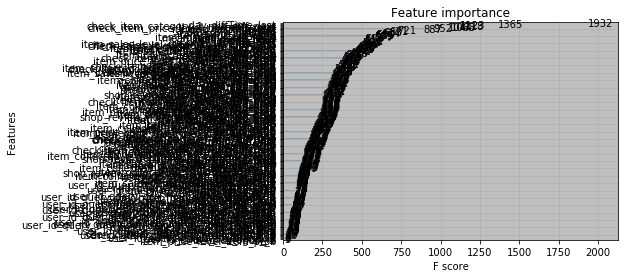

In [34]:
xgb.plot_importance(gbm)

In [35]:
importance = gbm.get_fscore()
for key,value in importance.items():
    print(key,value)

u_day_diffTime_last 1932
user_id_query_day_item_id 86
item_price_level_mean_by_category 174
check_item_price_level_min_diff_next 1118
mean_item_price_level 479
shop_score_delivery 671
check_item_category_1_min_diff_last 352
user_age_level 294
mean_item_sales_level 579
check_item_id_min_diff_next 466
user_mean_hour 577
item_pv_level_item_prob 307
item_id_shop_prob 442
item_brand_id_user_prob 306
item_city_id_shop_rev_prob 302
hour 721
shop_hour_active_user 314
item_hour_cnt_ratio 624
shop_id 511
item_sales_level_mean_by_brand 325
item_pv_level_mean_by_brand 172
i_day_diffTime_first 887
shop_review_num_level_user_age_prob 225
check_item_brand_id_min_diff_last 124
item_id_lasttime_diff 1063
click_user_item_lab 299
item_mean_age 590
item_id_user_occ_prob 242
click_user_lab 106
check_context_page_id_ratio 85
item_price_level_mean_by_city_ratio 372
item_sales_level_mean_by_city_ratio 492
user_day_active_city 145
item_collected_level_salse_prob 418
sale_price 173
item_pv_level_salse_prob 366
